# Python Tutorial - How to work with OceanWatch data in Python

This tutorial will show the steps to grab data in ERDDAP from Python, how to work with NetCDF files in Python and how to make some maps and time-series od chlorophyll-a concentration around the main Hawaiian islands

## 1. Downlading data from Python

Because ERDDAP includes RESTful services, you can download data listed on any ERDDAP platform from R using the URL structure. For example, the following page allows you to subset monthly Chlorophyll a data from the Aqua-MODIS sensor https://oceanwatch.pifsc.noaa.gov/erddap/griddap/OceanWatch_aqua_chla_monthly.html. Select your region and date range of interest, then select the '.nc' (NetCDF) file type and click on "Just Generate the URL".

![](img/erddap2.png)

In this specific example, the URL we generated is :
https://oceanwatch.pifsc.noaa.gov/erddap/griddap/CRW_sst_v1_0_monthly.nc?analysed_sst[(2018-01-01T12:00:00Z):1:(2018-12-01T12:00:00Z)][(17):1:(30)][(195):1:(210)]

In Python, run the following to download the data using the generated URL :


In [37]:
import urllib.request
url="https://oceanwatch.pifsc.noaa.gov/erddap/griddap/CRW_sst_v1_0_monthly.nc?analysed_sst[(2018-01-01T12:00:00Z):1:(2018-12-01T12:00:00Z)][(17):1:(30)][(195):1:(210)]"
urllib.request.urlretrieve(url, "sst.nc")

('sst.nc', <http.client.HTTPMessage at 0x1e994364f28>)

# 2. Importing NetCDF4 data in Python

Now that we've downloaded the data locally, we can import it and extract our variables of interest:

In [38]:
import xarray as xr
import netCDF4 as nc

In [39]:
ds = xr.open_dataset('sst.nc',decode_cf=False)

In [40]:
ds

<xarray.Dataset>
Dimensions:       (latitude: 261, longitude: 301, time: 12)
Coordinates:
  * time          (time) float64 1.515e+09 1.517e+09 ... 1.541e+09 1.544e+09
  * latitude      (latitude) float32 17.025 17.075 17.125 ... 29.975 30.025
  * longitude     (longitude) float32 195.025 195.075 ... 209.975 210.025
Data variables:
    analysed_sst  (time, latitude, longitude) float64 ...
Attributes:
    acknowledgement:            NOAA Coral Reef Watch Program
    cdm_data_type:              Grid
    comment:                    This product is designed to improve on and re...
    contributor_name:           NOAA Coral Reef Watch program
    contributor_role:           Collecting source data and deriving products;...
    Conventions:                CF-1.6, ACDD-1.3, COARDS
    creator_email:              coralreefwatch@noaa.gov
    creator_institution:        NOAA/NESDIS/STAR Coral Reef Watch program
    creator_name:               NOAA Coral Reef Watch program
    creator_type:        

In [41]:
ds.coords

Coordinates:
  * time       (time) float64 1.515e+09 1.517e+09 ... 1.541e+09 1.544e+09
  * latitude   (latitude) float32 17.025 17.075 17.125 ... 29.925 29.975 30.025
  * longitude  (longitude) float32 195.025 195.075 195.125 ... 209.975 210.025

In [42]:
ds.longitude.values

array([195.025, 195.075, 195.125, 195.175, 195.225, 195.275, 195.325,
       195.375, 195.425, 195.475, 195.525, 195.575, 195.625, 195.675,
       195.725, 195.775, 195.825, 195.875, 195.925, 195.975, 196.025,
       196.075, 196.125, 196.175, 196.225, 196.275, 196.325, 196.375,
       196.425, 196.475, 196.525, 196.575, 196.625, 196.675, 196.725,
       196.775, 196.825, 196.875, 196.925, 196.975, 197.025, 197.075,
       197.125, 197.175, 197.225, 197.275, 197.325, 197.375, 197.425,
       197.475, 197.525, 197.575, 197.625, 197.675, 197.725, 197.775,
       197.825, 197.875, 197.925, 197.975, 198.025, 198.075, 198.125,
       198.175, 198.225, 198.275, 198.325, 198.375, 198.425, 198.475,
       198.525, 198.575, 198.625, 198.675, 198.725, 198.775, 198.825,
       198.875, 198.925, 198.975, 199.025, 199.075, 199.125, 199.175,
       199.225, 199.275, 199.325, 199.375, 199.425, 199.475, 199.525,
       199.575, 199.625, 199.675, 199.725, 199.775, 199.825, 199.875,
       199.925, 199.

In [43]:
ds.latitude.values

array([17.025, 17.075, 17.125, 17.175, 17.225, 17.275, 17.325, 17.375,
       17.425, 17.475, 17.525, 17.575, 17.625, 17.675, 17.725, 17.775,
       17.825, 17.875, 17.925, 17.975, 18.025, 18.075, 18.125, 18.175,
       18.225, 18.275, 18.325, 18.375, 18.425, 18.475, 18.525, 18.575,
       18.625, 18.675, 18.725, 18.775, 18.825, 18.875, 18.925, 18.975,
       19.025, 19.075, 19.125, 19.175, 19.225, 19.275, 19.325, 19.375,
       19.425, 19.475, 19.525, 19.575, 19.625, 19.675, 19.725, 19.775,
       19.825, 19.875, 19.925, 19.975, 20.025, 20.075, 20.125, 20.175,
       20.225, 20.275, 20.325, 20.375, 20.425, 20.475, 20.525, 20.575,
       20.625, 20.675, 20.725, 20.775, 20.825, 20.875, 20.925, 20.975,
       21.025, 21.075, 21.125, 21.175, 21.225, 21.275, 21.325, 21.375,
       21.425, 21.475, 21.525, 21.575, 21.625, 21.675, 21.725, 21.775,
       21.825, 21.875, 21.925, 21.975, 22.025, 22.075, 22.125, 22.175,
       22.225, 22.275, 22.325, 22.375, 22.425, 22.475, 22.525, 22.575,
      

In [44]:
ds.time

<xarray.DataArray 'time' (time: 12)>
array([1.514808e+09, 1.517486e+09, 1.519906e+09, 1.522584e+09, 1.525176e+09,
       1.527854e+09, 1.530446e+09, 1.533125e+09, 1.535803e+09, 1.538395e+09,
       1.541074e+09, 1.543666e+09])
Coordinates:
  * time     (time) float64 1.515e+09 1.517e+09 1.52e+09 ... 1.541e+09 1.544e+09
Attributes:
    _CoordinateAxisType:    Time
    actual_range:           [1.5148080e+09 1.5436656e+09]
    axis:                   T
    coverage_content_type:  coordinate
    ioos_category:          Time
    long_name:              reference time of the sst field
    standard_name:          time
    time_origin:            01-JAN-1970 00:00:00
    units:                  seconds since 1970-01-01T00:00:00Z

In [45]:
dates=nc.num2date(ds.time,ds.time.units)
dates

array([datetime.datetime(2018, 1, 1, 12, 0),
       datetime.datetime(2018, 2, 1, 12, 0),
       datetime.datetime(2018, 3, 1, 12, 0),
       datetime.datetime(2018, 4, 1, 12, 0),
       datetime.datetime(2018, 5, 1, 12, 0),
       datetime.datetime(2018, 6, 1, 12, 0),
       datetime.datetime(2018, 7, 1, 12, 0),
       datetime.datetime(2018, 8, 1, 12, 0),
       datetime.datetime(2018, 9, 1, 12, 0),
       datetime.datetime(2018, 10, 1, 12, 0),
       datetime.datetime(2018, 11, 1, 12, 0),
       datetime.datetime(2018, 12, 1, 12, 0)], dtype=object)

In [46]:
ds.data_vars

Data variables:
    analysed_sst  (time, latitude, longitude) float64 ...

In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
np.warnings.filterwarnings('ignore')

In [48]:
ds.analysed_sst.shape

(12, 261, 301)

In [49]:
np.nanmin(ds.analysed_sst)

17.922142857142862

In [50]:
np.nanmax(ds.analysed_sst)

28.390645161290323

In [51]:
jet=["blue", "#007FFF", "cyan","#7FFF7F", "yellow", "#FF7F00", "red", "#7F0000"]
levs = np.arange(17.5, 28.5, 0.05)
cm = LinearSegmentedColormap.from_list('my_jet', jet, N=len(levs))

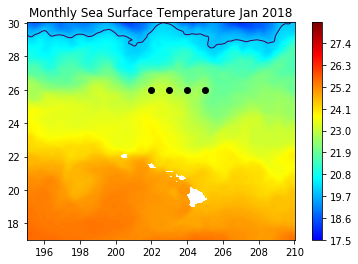

In [52]:
plt.contourf(ds.longitude, ds.latitude, ds.analysed_sst[0,:,:], levs,cmap=cm)
plt.colorbar()
plt.scatter(range(202,206),np.repeat(26,4),c='black')
plt.contour(ds.longitude, ds.latitude, ds.analysed_sst[0,:,:],levels=20,linewidths=1)
plt.title("Monthly Sea Surface Temperature " + dates[0].strftime('%b %Y'))
#plt.title("Monthly Sea Surface Temperature " + dates[0].strftime('%Y-%m'))
plt.show()

In [53]:
lat_bnds, lon_bnds = [18, 23], [200, 206]
da=ds.sel(latitude=slice(*lat_bnds), longitude=slice(*lon_bnds))

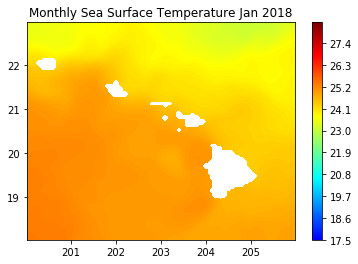

In [54]:
plt.contourf(da.longitude, da.latitude, da.analysed_sst[0,:,:], levs,cmap=cm)
plt.colorbar()
plt.title("Monthly Sea Surface Temperature " + dates[0].strftime('%b %Y'))
plt.show()

In [55]:
res=np.mean(da.analysed_sst,axis=(1,2))

Text(0,0.5,'SST (ºC)')

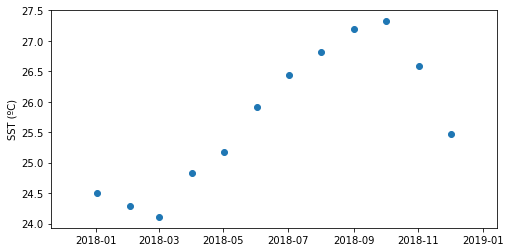

In [56]:
plt.figure(figsize=(8,4))
plt.scatter(dates,res)
plt.ylabel('SST (ºC)')

In [57]:
mean_sst=np.mean(ds.analysed_sst,axis=0)

In [58]:
mean_sst.shape

(261, 301)

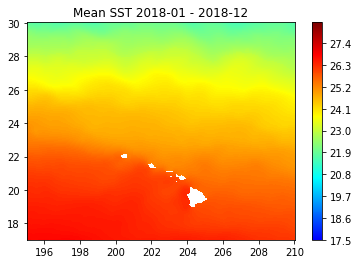

In [59]:
plt.contourf(ds.longitude, ds.latitude, mean_sst, levs,cmap=cm)
plt.colorbar()
plt.title("Mean SST " + dates[0].strftime('%Y-%m')+' - '+dates[11].strftime('%Y-%m'))
plt.show()